- Do the following exercises in a jupyter notebook
- Import the pandas, numpy and seaborn packages
- Load the diamonds dataset using the following line:

    `diamonds = sns.load_dataset("diamonds")`


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Show the distribution of the price variable in a plot

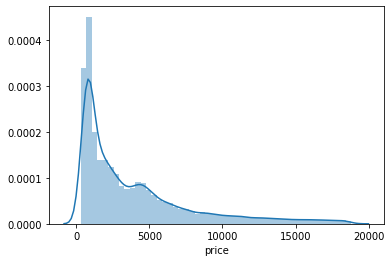

In [5]:
sns.distplot(diamonds["price"])

- Show in a graph the number of diamonds per cut type

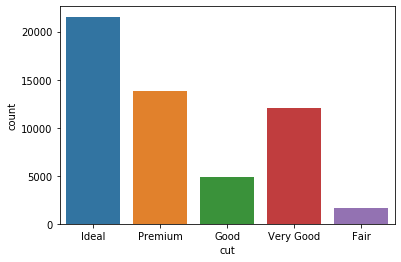

In [6]:
sns.countplot(diamonds['cut'])

- Show the relation between the `carat` and `price` only for the `fair` diamonds

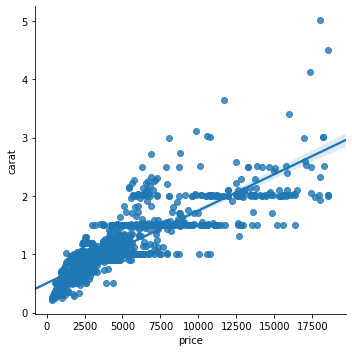

In [7]:
fair_diamonds = diamonds[diamonds['cut'] == 'Fair']
sns.lmplot(x="price", y="carat", data=fair_diamonds)

- Show the relationship between the `carat` and the `price` for every `cut`

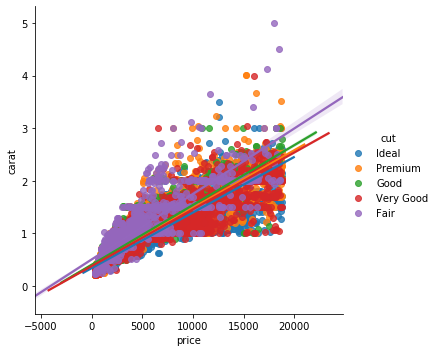

In [9]:
sns.lmplot(x="price", y="carat", hue="cut", data=diamonds)

- For every `cut` of diamond calculate the following variables:
    - minimal `price`
    - maximal `price`
    - mean `price`
    - median `price`

In [10]:
diamonds.groupby('cut')['price'].agg(['min', 'max', 'mean', np.median])

,min,max,mean,median
cut,,,,
Fair,337,18574,4358.757764,3282.0
Good,327,18788,3928.864452,3050.5
Ideal,326,18806,3457.541970,1810.0
Premium,326,18823,4584.257704,3185.0
Very Good,336,18818,3981.759891,2648.0


- Show the median price per cut in a graph

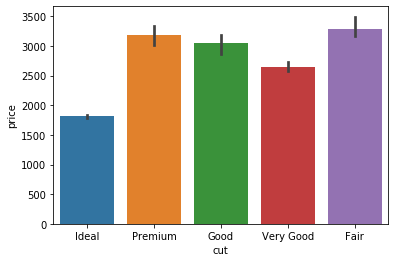

In [13]:
sns.barplot(x="cut", y="price", estimator=np.median, data=diamonds)

- Show in a graph the `x` and `y` values of the 10 most expensive diamonds

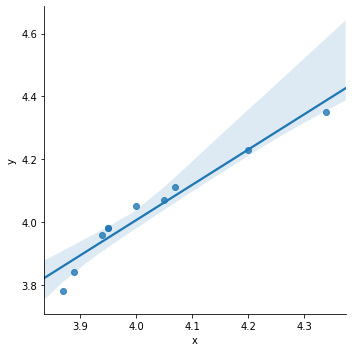

In [15]:
expensive_diamonds = diamonds.sort_values(by='price').head(10)
sns.lmplot(x='x', y='y', data=expensive_diamonds)

- Show if there is a relation between the `color` and the `price`

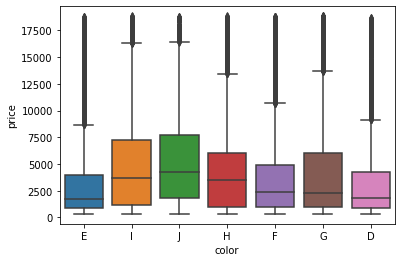

In [16]:
sns.boxplot(x='color', y='price', data=diamonds)